## Training neural network from scratch

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\suees\\skill\\cohort 4.0\\AI\\Learning-AI\\Refresher\\train.csv\\train.csv",)


In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(df)

In [5]:
y_train = data[:,0]
X_train = data[:,1:]

In [6]:
X_train = np.array(X_train/255)
y_train_hot = np.array(pd.get_dummies(y_train))


In [7]:
y_train_hot.shape,X_train.shape

((42000, 10), (42000, 784))

In [8]:
def init_parameters():
    w1 = np.random.rand(784,20) - 0.5
    b1 = np.random.rand(20) - 0.5
    w2 = np.random.rand(20, 10) - 0.5
    b2 = np.random.rand(10) - 0.5

    return w1,b1,w2,b2


In [9]:
def relu(z):
    return np.maximum(z,0)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [10]:
def forward_prop(X_train,w1,b1,w2,b2):


    z1 = X_train.dot(w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1,w2) + b2
    a2 = softmax(z2)

    return z1,a1,z2,a2


In [11]:
def relu_deriv(z):
    return z>0



In [12]:
m = 42000 # rows in our data

In [13]:
def back_prop(y_train_hot,X_train,a1,a2,w1,w2,z1):
    z1 = np.array(z1)
    dw2 = 1/m* (a1.T.dot(a2 - y_train_hot))
    db2 = 1/m* (np.sum(a2 -y_train_hot))
    d_inter = (a2-y_train_hot).dot(w2.T)*relu_deriv(z1)
    dw1 = 1/m* (X_train.T.dot(d_inter))
    db1 = 1/m* np.sum(d_inter)

    return dw1,db1,dw2,db2




In [14]:
def update_param(w1,b1,w2,b2,dw1,db1,dw2,db2):

        w1 = w1 - 0.1*(dw1)
        b1 = b1 - 0.1*(db1)
        w2 = w2 - 0.1*(dw2)
        b2 = b2 - 0.1*(db2)


        return w1,b1,w2,b2

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
def gradient_descent(epochs,y_train_hot,X_train,w1,b1,w2,b2,y_train):

    for i in range(epochs):
        z1,a1,z2,a2 = forward_prop(X_train,w1,b1,w2,b2)
        dw1,db1,dw2,db2 = back_prop(y_train_hot,X_train,a1,a2,w1,w2,z1)
        w1,b1,w2,b2 = update_param(w1,b1,w2,b2,dw1,db1,dw2,db2)

        if i%10==0:

            y_pred = np.argmax(a2,1)
            print("epochs : ",i)
            print("Accuracy :- ",accuracy_score(y_train,y_pred))


    return w1,b1,w2,b2


In [17]:
w1,b1,w2,b2 = init_parameters()



In [18]:
z1,a1,z2,a2 = forward_prop(X_train,w1,b1,w2,b2)

In [19]:
w1,b1,w2,b2 = gradient_descent(1000,y_train_hot,X_train,w1,b1,w2,b2,y_train)

epochs :  0
Accuracy :-  0.07288095238095238
epochs :  10
Accuracy :-  0.21869047619047619
epochs :  20
Accuracy :-  0.336
epochs :  30
Accuracy :-  0.42978571428571427
epochs :  40
Accuracy :-  0.49733333333333335
epochs :  50
Accuracy :-  0.5470238095238096
epochs :  60
Accuracy :-  0.5855714285714285
epochs :  70
Accuracy :-  0.6171666666666666
epochs :  80
Accuracy :-  0.6419285714285714
epochs :  90
Accuracy :-  0.6640238095238096
epochs :  100
Accuracy :-  0.6820952380952381
epochs :  110
Accuracy :-  0.7007380952380953
epochs :  120
Accuracy :-  0.7181904761904762
epochs :  130
Accuracy :-  0.7312857142857143
epochs :  140
Accuracy :-  0.7446666666666667
epochs :  150
Accuracy :-  0.7558333333333334
epochs :  160
Accuracy :-  0.7653095238095238
epochs :  170
Accuracy :-  0.7743333333333333
epochs :  180
Accuracy :-  0.7825714285714286
epochs :  190
Accuracy :-  0.7895238095238095
epochs :  200
Accuracy :-  0.7964523809523809
epochs :  210
Accuracy :-  0.8018095238095239
epochs :

In [20]:
z1,a1,z2,a2 = forward_prop(X_train,w1,b1,w2,b2) # again to get the new probablites based of our new weight and biasis

In [21]:
y_pred = np.argmax(a2,1) # changing probablities into new prediction by taking max one

In [22]:
accuracy_score(y_train,y_pred) # trainig data accuracy

0.8918571428571429

In [23]:
df2 = pd.read_csv("C:\\Users\\suees\\skill\\cohort 4.0\\AI\\Learning-AI\\Refresher\\test.csv\\test.csv")

In [24]:
df2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_test = np.array(df2)
X_test = np.array(X_test/255)


In [26]:
z1,a1,z2,a2 = forward_prop(X_test,w1,b1,w2,b2)

a2 = np.argmax(a2,1)

In [27]:
import matplotlib.pyplot as plt
def test(X_test,index,pred):
    plt.imshow(X_test[index].reshape(28,28),cmap = 'gray')
    print(pred[index])
    plt.show()

2


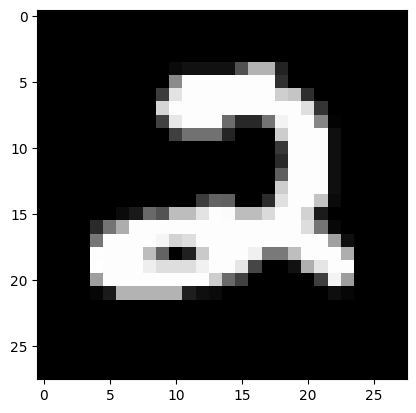

0


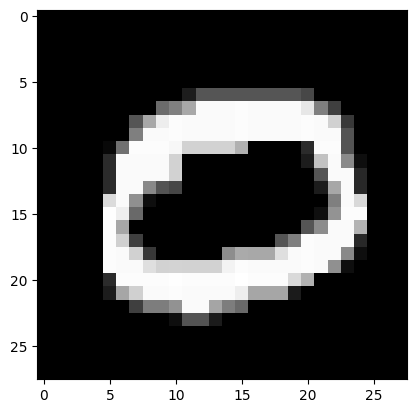

9


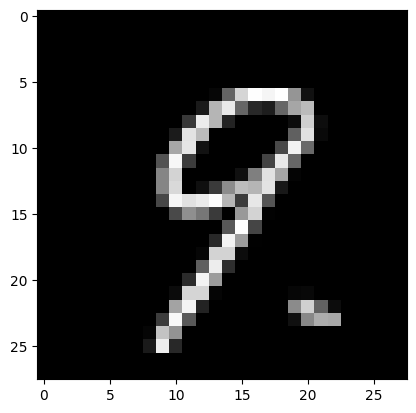

7


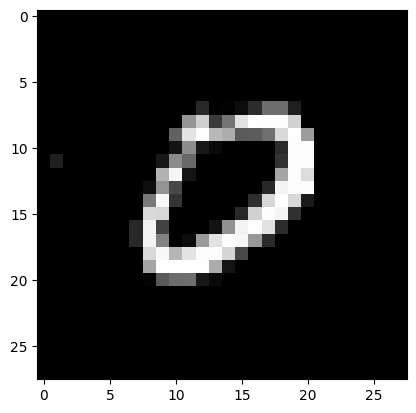

2


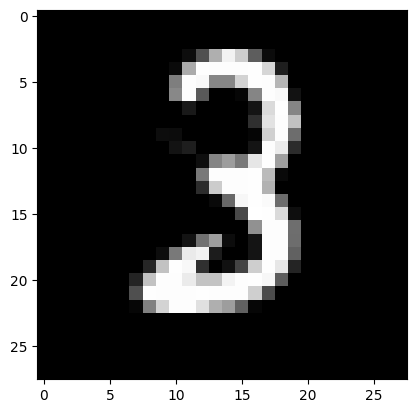

7


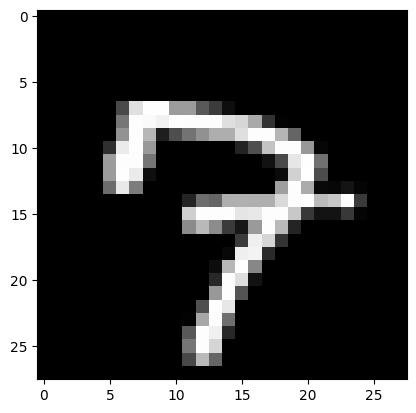

0


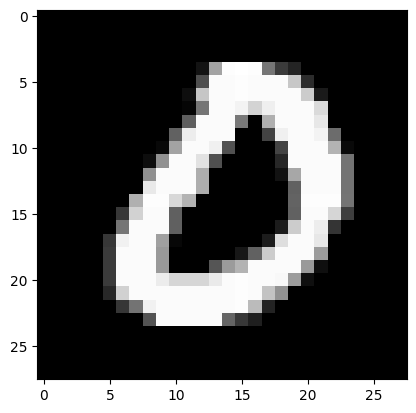

3


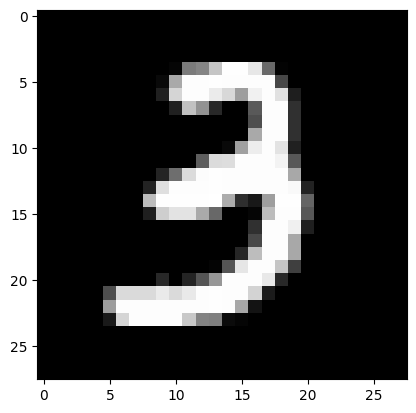

0


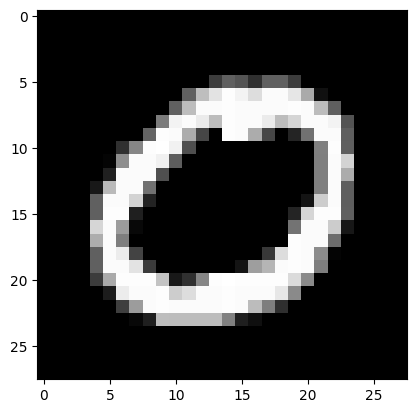

3


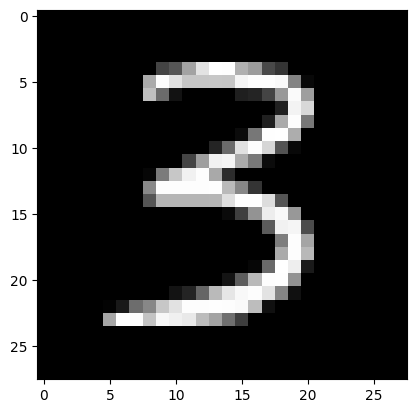

In [28]:

for i in  range(10):
    test(X_test,i,a2)


## AS you can see it is decent and we can definetly increse perfomance by incresing layers and biasis but it will increase the computation 